In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport


In [2]:
df = pd.read_csv("data/silver.csv")
pd.set_option('display.max_columns', None)  


In [4]:


df



,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,total_client_années,nombre_commande_client_années_2009_x,nombre_commande_client_années_2010_x,nombre_commande_client_années_2011_x,nombre_commande_client_années_2009_y,nombre_commande_client_années_2010_y,nombre_commande_client_années_2011_y,nbre_annulation
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390
797881,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390
797882,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390
797883,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390


In [10]:
num_unique_customers = df['Customer ID'].nunique()
print("Nombre de Customer ID uniques : ", num_unique_customers)


Nombre de Customer ID uniques :  5942


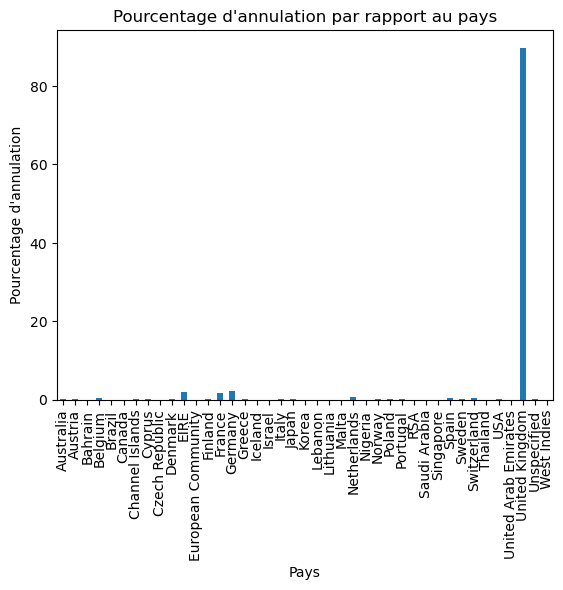

In [14]:
data = df.groupby('Country')['nbre_annulation'].sum()

# Filtrer les pays ayant au moins une annulation
data = data[data > 0]

# Calculer les pourcentages d'annulation par rapport au total
percentages = (data / data.sum()) * 100

# Tracer l'histogramme des pourcentages d'annulation par pays
percentages.plot(kind='bar')
plt.xlabel('Pays')
plt.ylabel('Pourcentage d\'annulation')
plt.title('Pourcentage d\'annulation par rapport au pays')
plt.show()


# data = df.groupby('Customer ID')['nbre_annulation'].sum()

# # Filtrer les clients ayant au moins une annulation
# data = data[data > 0]

# # Calculer les pourcentages d'annulation par rapport au total
# percentages = (data / data.sum()) * 100

# # Créer une liste des Customer ID uniques
# customer_ids = data.index.tolist()

# # Tracer le graphique en camembert pour tous les Customer ID uniques
# plt.pie(percentages, labels=customer_ids, autopct='%1.1f%%')
# plt.title('Pourcentage d\'annulation pour tous les Customer ID')
# plt.show()

In [17]:
df['Dernière Date Achat'] = df.groupby('Customer ID')['InvoiceDate'].transform('max')
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,total_client_années,nombre_commande_client_années_2009_x,nombre_commande_client_années_2010_x,nombre_commande_client_années_2011_x,nombre_commande_client_années_2009_y,nombre_commande_client_années_2010_y,nombre_commande_client_années_2011_y,nbre_annulation,Dernière Date Achat
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390,2011-07-05
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390,2011-07-05
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390,2011-07-05
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390,2011-07-05
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390,2011-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390,2011-12-09
797881,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390,2011-12-09
797882,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390,2011-12-09
797883,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390,2011-12-09


In [19]:
df['Frequency'] = df.groupby('Customer ID')['Invoice'].transform('count')
df


,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,total_client_années,nombre_commande_client_années_2009_x,nombre_commande_client_années_2010_x,nombre_commande_client_années_2011_x,nombre_commande_client_années_2009_y,nombre_commande_client_années_2010_y,nombre_commande_client_années_2011_y,nbre_annulation,Dernière Date Achat,Frequency
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390,2011-07-05,92
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390,2011-07-05,92
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390,2011-07-05,92
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390,2011-07-05,92
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,NaN,NaN,NaN,4.0,3.0,3.0,18390,2011-07-05,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390,2011-12-09,53
797881,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390,2011-12-09,53
797882,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390,2011-12-09,53
797883,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,NaN,NaN,NaN,0.0,0.0,4.0,18390,2011-12-09,53
